In [11]:
import puss
from puss import reaction_bools
from puss import single_reaction_bool
from puss import prepolymer_reaction
from puss import prepolymer_reaction_bools
#批次生成聚合物片段 
file="460.csv"

reaction_bools(file)
#批次生成预聚物
prepolymer_reaction_bools(file)

In [ ]:
#单个预聚物
polyol=['[Re]C(COC(C)COC(COC(COC(COC(COC(COC(COC(COC(C)COC(C)COC(COC(COC(COC(COC(COC(COC(C[Re])C)C)C)C)C)C)C)C)C)C)C)C)C)C)']
Diisocyanate = ['O=C=NCCCCCCN=C=O']
prepolymer_reaction(polyol,Diisocyanate)

In [ ]:
#单个聚合物片段
polyol =' [Re]C(COC(C)COC(COC(COC(COC(COC(COC(COC(COC(C)COC(C)COC(COC(COC(COC(COC(COC(COC(C[Re])C)C)C)C)C)C)C)C)C)C)C)C)C)C)C ' 
Diisocyanate = 'O=C=NCCCCCCN=C=O'
extender1 ='[Rn]C1=CC=C(CCC2=CC=C([Rn])C=C2)C=C1'
extender2 ='[Rn]C1=CC=C(SSC2=CC=C([Rn])C=C2)C=C1' 
single_reaction_bool(polyol,Diisocyanate,extender1,extender2)

In [ ]:
#desptors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split  #分割数据集
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error   #模型评价
import warnings
warnings.filterwarnings("ignore")
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [31]:
df=pd.read_csv('460.csv')

In [32]:
df

,polyol,Diisocyanate,extender1,extender2,polymer-unit,prepolymer,extender1append,extender2append,polol_mw,polyol_ratio,Diisocyanate_ratio,extender1_ratio,extender2_ratio,di_mw,ex1_mw,ex2_mw
0,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]C1=CC=C(SSC2=CC=C([Rn])C=C2)C=C1,[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NC1=CC=C(SSC2=CC=C(N)C=C2)C=C1,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,248.376,90.122
1,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Re]CCSSCC[Re],[Re]CCCC[Re],COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,OCCSSCCO,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,154.256,90.122
2,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]CSSC[Rn],[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NCSSCN,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,124.234,90.122
3,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]C(C(OC)=O)CSSCC(C(OC)=O)[Rn],[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NC(C(OC)=O)CSSCC(C(OC)=O)N,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,268.360,90.122
4,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Re]C1=CC=C(SSC2=CC=C([Re])C=C2)C=C1,[Re]CCCC[Re],COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,OC1=CC=C(SSC2=CC=C(O)C=C2)C=C1,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,250.344,90.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Re]CCCSSCCC[Re],O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,OCCCSSCCCO,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,182.310,169.184
2396,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Rn]C(C(OC)=O)CSSCC(C(OC)=O)[Rn],O=C1N=C([N])NC(C)=C1CC[O],CNC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,NC(C(OC)=O)CSSCC(C(OC)=O)N,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,268.360,169.184
2397,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Re]CCOC(C1=C(C=CC=C1)SSC2=CC=CC=C2C(OCC[Re])=...,O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,OCCOC(C1=C(C=CC=C1)SSC2=CC=CC=C2C(OCCO)=O)=O,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,394.470,169.184
2398,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,O=C(OCCCC[Re])C1=CC=CC=C1SSC(C=CC=C2)=C2C(OCCC...,O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,O=C(OCCCCO)C1=CC=CC=C1SSC(C=CC=C2)=C2C(OCCCCO)=O,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,450.578,169.184


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split  #分割数据集
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error   #模型评价
import warnings
warnings.filterwarnings("ignore")
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors


In [22]:
?rdkit

Object `rdkit` not found.


In [21]:
df

,polyol,Diisocyanate,extender1,extender2,polymer-unit,prepolymer,extender1append,extender2append,polol_mw,polyol_ratio,Diisocyanate_ratio,extender1_ratio,extender2_ratio,di_mw,ex1_mw,ex2_mw
0,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]C1=CC=C(SSC2=CC=C([Rn])C=C2)C=C1,[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NC1=CC=C(SSC2=CC=C(N)C=C2)C=C1,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,248.376,90.122
1,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Re]CCSSCC[Re],[Re]CCCC[Re],COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,OCCSSCCO,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,154.256,90.122
2,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]CSSC[Rn],[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NCSSCN,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,124.234,90.122
3,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Rn]C(C(OC)=O)CSSCC(C(OC)=O)[Rn],[Re]CCCC[Re],CNC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,NC(C(OC)=O)CSSCC(C(OC)=O)N,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,268.360,90.122
4,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,O=C=NC1=CC=C(CC2=CC=C(N=C=O)C=C2)C=C1,[Re]C1=CC=C(SSC2=CC=C([Re])C=C2)C=C1,[Re]CCCC[Re],COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,COC(=O)Nc1ccc(Cc2ccc(NC(=O)OCCCCOCCCCOCCCCOCCC...,OC1=CC=C(SSC2=CC=C(O)C=C2)C=C1,OCCCCO,2000,0.25,0.5,0.2500,0.0000,250.257,250.344,90.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Re]CCCSSCCC[Re],O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,OCCCSSCCCO,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,182.310,169.184
2396,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Rn]C(C(OC)=O)CSSCC(C(OC)=O)[Rn],O=C1N=C([N])NC(C)=C1CC[O],CNC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,NC(C(OC)=O)CSSCC(C(OC)=O)N,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,268.360,169.184
2397,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,[Re]CCOC(C1=C(C=CC=C1)SSC2=CC=CC=C2C(OCC[Re])=...,O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,OCCOC(C1=C(C=CC=C1)SSC2=CC=CC=C2C(OCCO)=O)=O,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,394.470,169.184
2398,[Re]CCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCCCCOCC...,CC1(C)CC(C)(CN=C=O)CC(N=C=O)C1,O=C(OCCCC[Re])C1=CC=CC=C1SSC(C=CC=C2)=C2C(OCCC...,O=C1N=C([N])NC(C)=C1CC[O],COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,COC(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCCCOCCCCOCCCC...,O=C(OCCCCO)C1=CC=CC=C1SSC(C=CC=C2)=C2C(OCCCCO)=O,O=C1N=C(N)NC(C)=C1CCO,1000,0.25,0.5,0.0625,0.1875,222.288,450.578,169.184


In [34]:
df=pd.read_csv('460.csv')
smiles = df.iloc[:,4]
mw=[]
for  smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    # 计算分子的相对分子质量
    mol_weight = Descriptors.MolWt(mol)
    mw.append(mol_weight)
df['piece_mw']=mw 
df.to_csv('460.csv', index=False)

In [22]:
#dataset=pd.read_csv('.csv')
smiles = df.iloc[:,4]
descriptor_names = ['SMR_VSA6',
       'FpDensityMorgan2', 'BCUT2D_MRLOW',
        'PEOE_VSA10', 'VSA_EState6', 'VSA_EState9',
        'PEOE_VSA7',  'piece_mw', 
       'HallKierAlpha', 'SPS',
     'BCUT2D_MWHI',
       'MinAbsEStateIndex', 'MaxAbsEStateIndex',
       'qed', 'BCUT2D_MRHI',
    'BalabanJ',
       'EState_VSA6', 'MaxPartialCharge', 'MinEStateIndex',
       'PEOE_VSA9', 
       'NumAliphaticHeterocycles', 'VSA_EState5',
       'VSA_EState2', 'BertzCT']
#for descriptor_information in descriptor_names:
    #descriptor_names.append(descriptor_information[0]) # 第一列列名
print("The num of descriptors:", len(descriptor_names))
descriptors = []
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
print("num of molcular:%d" % len(smiles))
for index, smiles_i in enumerate(smiles):
    # print(index + 1, '/' ,len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)
    descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
descriptors1=[]    
for descriptor in descriptor_names:
    descriptor='piece'+descriptor
    descriptors1.append(descriptor)
    
    
descriptors1 = pd.DataFrame(descriptors, columns = descriptors1)
descriptors5= pd.DataFrame(descriptors1)
descriptors5

The num of descriptors: 24
num of molcular:2400


,pieceSMR_VSA6,pieceFpDensityMorgan2,pieceBCUT2D_MRLOW,piecePEOE_VSA10,pieceVSA_EState6,pieceVSA_EState9,piecePEOE_VSA7,piecepiece_mw,pieceHallKierAlpha,pieceSPS,...,pieceBCUT2D_MRHI,pieceBalabanJ,pieceEState_VSA6,pieceMaxPartialCharge,pieceMinEStateIndex,piecePEOE_VSA9,pieceNumAliphaticHeterocycles,pieceVSA_EState5,pieceVSA_EState2,pieceBertzCT
0,2039.069198,0.052863,0.075255,0.000000,136.666547,6.069688,2257.916393,777,-30.62,11.689427,...,8.763784,0.183903,28.635468,0.411112,-0.582960,86.392381,0,0.000000,201.915375,22429.016547
1,2053.217218,0.045556,0.075255,13.213764,121.833371,5.694522,2209.385457,777,-29.06,11.695556,...,8.763545,0.203465,0.000000,0.411142,-0.582960,93.502179,0,1.094963,198.756508,21553.269215
2,2040.189198,0.054566,0.075255,0.000000,121.251129,5.709014,2209.385457,777,-29.06,11.694878,...,8.763229,0.203506,7.047672,0.411112,-0.582952,98.145958,0,0.632814,199.132743,21166.713749
3,2054.160923,0.060573,-0.142505,12.083682,117.449538,7.745683,2209.385457,777,-30.12,11.753304,...,8.763880,0.205104,31.313140,0.411112,-1.066523,100.611976,0,-1.234838,226.247033,22006.255210
4,2028.497746,0.051762,0.075255,11.499024,136.296685,5.723186,2257.916393,777,-30.62,11.689427,...,8.763781,0.183903,24.265468,0.416587,-0.617676,93.502179,0,0.775900,201.443729,22419.158257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1028.184263,0.147348,0.060610,0.000000,-1.352106,6.160213,1159.419974,777,-14.70,17.381139,...,8.762982,0.368307,28.511533,0.406854,-0.605777,100.109061,0,1.582542,225.569132,12329.792353
2396,1029.127969,0.168932,-0.142539,12.083682,-5.050235,7.942836,1146.578331,777,-15.76,17.415534,...,8.763479,0.373849,13.971409,0.406854,-1.054576,94.005094,0,-1.172986,253.714108,12698.649384
2397,1029.892320,0.163810,0.036469,26.427528,12.187240,5.259915,1170.843799,777,-17.32,17.171429,...,8.763773,0.314722,55.454674,0.406969,-0.641755,98.022200,0,-1.262694,254.549555,13476.081331
2398,1029.892320,0.160681,0.047275,0.000000,12.728468,5.390518,1196.527086,777,-17.32,17.132325,...,8.763777,0.314301,31.189205,0.406854,-0.605982,124.449728,0,-1.022723,254.445785,13557.145163


In [23]:
#dataset=pd.read_csv('test.csv')
smiles = df.iloc[:,6]
descriptor_names = ['PEOE_VSA2','VSA_EState4', 'VSA_EState7', 'PEOE_VSA9',
]
#for descriptor_information in Descriptors.descList:
   # descriptor_names.append(descriptor_information[0]) # 第一列列名
print("The num of descriptors:", len(descriptor_names))
descriptors = []
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
print("num of molcular:%d" % len(smiles))
for index, smiles_i in enumerate(smiles):
    # print(index + 1, '/' ,len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)
    descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
descriptors1=[]    
for descriptor in descriptor_names:
    descriptor='ex1'+descriptor
    descriptors1.append(descriptor)
    
    
descriptors2 = pd.DataFrame(descriptors, columns = descriptors1)
descriptors2= pd.DataFrame(descriptors2)
descriptors2

The num of descriptors: 4
num of molcular:2400


,ex1PEOE_VSA2,ex1VSA_EState4,ex1VSA_EState7,ex1PEOE_VSA9
0,0.000000,12.828008,0.000000,0.000000
1,0.000000,0.000000,0.000000,13.213764
2,0.000000,10.202315,0.000000,0.000000
3,9.589074,10.997995,0.000000,14.219595
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2395,0.000000,0.000000,1.743634,0.000000
2396,9.589074,10.997995,0.000000,14.219595
2397,0.000000,0.775534,0.000000,24.340667
2398,0.000000,0.922333,2.401793,24.340667


In [24]:
#dataset=pd.read_csv('test.csv')
smiles = df.iloc[:,7]
descriptor_names = ['PEOE_VSA9','BCUT2D_CHGHI','MinAbsEStateIndex', 'BCUT2D_LOGPLOW', 'FpDensityMorgan1', 'PEOE_VSA7' ,'BCUT2D_LOGPHI',  'FpDensityMorgan3',  'CUT2D_LOGPLOW','pDensityMorgan1','EOE_VSA7', 'MolLogP',  'MaxPartialCharge', 'TPSA']
#for descriptor_information in Descriptors.descList:
   # descriptor_names.append(descriptor_information[0]) # 第一列列名
print("The num of descriptors:", len(descriptor_names))
descriptors = []
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
print("num of molcular:%d" % len(smiles))
for index, smiles_i in enumerate(smiles):
    # print(index + 1, '/' ,len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)
    descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
descriptors1=[]    
for descriptor in descriptor_names:
    descriptor='ex2'+descriptor
    descriptors1.append(descriptor)
    
    
descriptors3 = pd.DataFrame(descriptors, columns = descriptors1)
descriptors3= pd.DataFrame(descriptors3)
descriptors3

The num of descriptors: 14
num of molcular:2400


,ex2PEOE_VSA9,ex2BCUT2D_CHGHI,ex2MinAbsEStateIndex,ex2BCUT2D_LOGPLOW,ex2FpDensityMorgan1,ex2PEOE_VSA7,ex2BCUT2D_LOGPHI,ex2FpDensityMorgan3,ex2CUT2D_LOGPLOW,ex2pDensityMorgan1,ex2EOE_VSA7,ex2MolLogP,ex2MaxPartialCharge,ex2TPSA
0,0.0,1.768325,0.195000,-1.849294,0.833333,12.841643,1.802227,1.333333,777,777,777,-0.24880,0.043137,40.46
1,0.0,1.768325,0.195000,-1.849294,0.833333,12.841643,1.802227,1.333333,777,777,777,-0.24880,0.043137,40.46
2,0.0,1.768325,0.195000,-1.849294,0.833333,12.841643,1.802227,1.333333,777,777,777,-0.24880,0.043137,40.46
3,0.0,1.768325,0.195000,-1.849294,0.833333,12.841643,1.802227,1.333333,777,777,777,-0.24880,0.043137,40.46
4,0.0,1.768325,0.195000,-1.849294,0.833333,12.841643,1.802227,1.333333,777,777,777,-0.24880,0.043137,40.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,2.043234,0.060002,-2.187984,1.666667,6.923737,1.991368,2.833333,777,777,777,-0.80468,0.277448,92.00
2396,0.0,2.043234,0.060002,-2.187984,1.666667,6.923737,1.991368,2.833333,777,777,777,-0.80468,0.277448,92.00
2397,0.0,2.043234,0.060002,-2.187984,1.666667,6.923737,1.991368,2.833333,777,777,777,-0.80468,0.277448,92.00
2398,0.0,2.043234,0.060002,-2.187984,1.666667,6.923737,1.991368,2.833333,777,777,777,-0.80468,0.277448,92.00


In [25]:
#dataset=pd.read_csv('test.csv')
smiles = df.iloc[:,5]
descriptor_names = ['BCUT2D_MWHI',  'SlogP_VSA5'
]
#for descriptor_information in Descriptors.descList:
   # descriptor_names.append(descriptor_information[0]) # 第一列列名
print("The num of descriptors:", len(descriptor_names))
descriptors = []
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
print("num of molcular:%d" % len(smiles))
for index, smiles_i in enumerate(smiles):
    # print(index + 1, '/' ,len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)
    descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
descriptors1=[]    
for descriptor in descriptor_names:
    descriptor='pre'+descriptor
    descriptors1.append(descriptor)
    
    
descriptors4 = pd.DataFrame(descriptors, columns = descriptors1)
descriptors4= pd.DataFrame(descriptors4)
descriptors4
#descriptors=pd.concat([descriptors5,descriptors2,descriptors3,descriptors4],axis=1)
#descriptors

The num of descriptors: 2
num of molcular:2400


,preBCUT2D_MWHI,preSlogP_VSA5
0,16.581111,394.661460
1,16.581111,394.661460
2,16.581111,394.661460
3,16.581111,394.661460
4,16.581111,394.661460
...,...,...
2395,16.562924,259.850358
2396,16.562924,259.850358
2397,16.562924,259.850358
2398,16.562924,259.850358


In [26]:
data={'R': [1], 
      'lg_ts':[2],
      'Diisocyanate_ratio':[3],
      'Hs_wt':[4], 
      'extender2_ratio':[5],
      'extender1_ratio':[6], 
      'piece_mw':[7],
      'polyol_MW':[8], 
      'mac_rate':[9],
     'polyol_ratio':[10]}
data=pd.DataFrame(data)
descriptors=pd.concat([descriptors5,descriptors2,descriptors3,descriptors4,data],axis=1)

In [27]:
descriptors

,pieceSMR_VSA6,pieceFpDensityMorgan2,pieceBCUT2D_MRLOW,piecePEOE_VSA10,pieceVSA_EState6,pieceVSA_EState9,piecePEOE_VSA7,piecepiece_mw,pieceHallKierAlpha,pieceSPS,...,R,lg_ts,Diisocyanate_ratio,Hs_wt,extender2_ratio,extender1_ratio,piece_mw,polyol_MW,mac_rate,polyol_ratio
0,2039.069198,0.052863,0.075255,0.000000,136.666547,6.069688,2257.916393,777,-30.62,11.689427,...,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
1,2053.217218,0.045556,0.075255,13.213764,121.833371,5.694522,2209.385457,777,-29.06,11.695556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2040.189198,0.054566,0.075255,0.000000,121.251129,5.709014,2209.385457,777,-29.06,11.694878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2054.160923,0.060573,-0.142505,12.083682,117.449538,7.745683,2209.385457,777,-30.12,11.753304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2028.497746,0.051762,0.075255,11.499024,136.296685,5.723186,2257.916393,777,-30.62,11.689427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1028.184263,0.147348,0.060610,0.000000,-1.352106,6.160213,1159.419974,777,-14.70,17.381139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2396,1029.127969,0.168932,-0.142539,12.083682,-5.050235,7.942836,1146.578331,777,-15.76,17.415534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,1029.892320,0.163810,0.036469,26.427528,12.187240,5.259915,1170.843799,777,-17.32,17.171429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,1029.892320,0.160681,0.047275,0.000000,12.728468,5.390518,1196.527086,777,-17.32,17.132325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
column_order = [ 'ex2PEOE_VSA9', 'R', 'ex2BCUT2D_CHGHI', 'pieceSMR_VSA6',
       'pieceFpDensityMorgan2', 'preBCUT2D_MWHI', 'pieceBCUT2D_MRLOW',
       'polyol_MW', 'piecePEOE_VSA10', 'pieceVSA_EState6', 'pieceVSA_EState9',
       'preSlogP_VSA5', 'piecePEOE_VSA7', 'ex2MinAbsEStateIndex',
       'ex1PEOE_VSA2', 'ex1VSA_EState4', 'piece_mw', 'ex2BCUT2D_LOGPHI',
       'pieceHallKierAlpha', 'pieceSPS', 'polyol_ratio', 'ex2FpDensityMorgan3',
       'ex1VSA_EState7', 'mac_rate', 'pieceBCUT2D_MWHI', 'extender1_ratio',
       'pieceMinAbsEStateIndex', 'pieceMaxAbsEStateIndex', 'ex2BCUT2D_LOGPLOW',
       'Diisocyanate_ratio', 'Hs_wt', 'pieceqed', 'pieceBCUT2D_MRHI',
       'ex2FpDensityMorgan1', 'extender2_ratio', 'pieceBalabanJ',
       'pieceEState_VSA6', 'pieceMaxPartialCharge', 'pieceMinEStateIndex',
       'piecePEOE_VSA9', 'ex2PEOE_VSA7', 'ex2MolLogP',
       'pieceNumAliphaticHeterocycles', 'ex1PEOE_VSA9', 'pieceVSA_EState5',
       'pieceVSA_EState2', 'ex2MaxPartialCharge', 'pieceBertzCT', 'ex2TPSA',
       'lg_ts']


# 按照指定的列名重新索引DataFrame的列顺序
df = descriptors[column_order]

In [29]:
df.to_csv('460ts.csv')      

In [10]:
df1=pd.read_csv('out.csv')


In [11]:
x=df1.iloc[:,1]
y=df1.iloc[:,2]
z=df1.iloc[:,3]

In [108]:
y

0      394.491900
1      347.735211
2      368.621387
3      378.446599
4      397.434074
          ...    
847    336.292400
848    901.032511
849    901.032511
850    739.782118
851    464.549124
Name: Eb/%, Length: 852, dtype: float64

In [53]:
import pyecharts.options as opts
from pyecharts.charts import Scatter3D  # 将制作3D散点图需要用到的库包导入
c = (
    Scatter3D()
    .add(
        '',
        data = [[i,j,k] for i,j,k in zip(abs(x),abs(y),abs(z))], # 数据：二维数组
        
        xaxis3d_opts=opts.Axis3DOpts( # x轴配置
            name='Ts  (MPa)',
            type_="value",
        ),
        yaxis3d_opts=opts.Axis3DOpts( # y轴配置
            name='Eb  (%)',
            type_="value",
        ),
        zaxis3d_opts=opts.Axis3DOpts( # z轴配置
            name='E',
            type_="value",
        ),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
                max_= 0.9,
                range_color=[
                    "#1710c0",
                    "#0b9df0",
                    "#00fea8",
                    "#00ff0d",
                    "#f5f811",
                    "#f09a09",
                    "#fe0300",
                ],
        ),
    )
)


c.render_notebook()

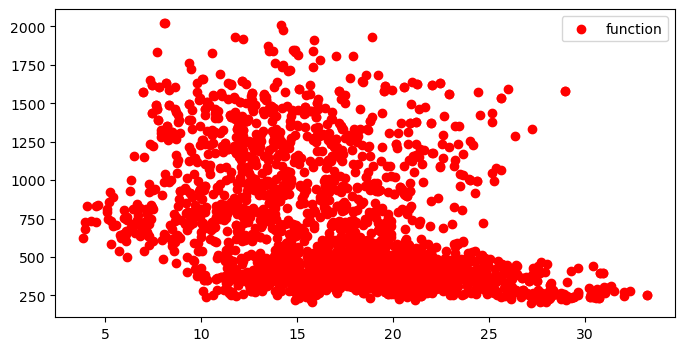

In [102]:
# 导入我们所需的库 as：即给库取别名，方便书写
import matplotlib.pyplot as plt
import numpy as np

# 定义数据


# 绘图
# 1. 确定画布
plt.figure(figsize=(8, 4))  # figsize:确定画布大小 

# 2. 绘图
plt.scatter(x,  # 横坐标
            y,  # 纵坐标
            c='red',  # 点的颜色
            label='function')  # 标签 即为点代表的意思
# 3.展示图形
plt.legend()  # 显示图例

plt.show()  # 显示所绘图形




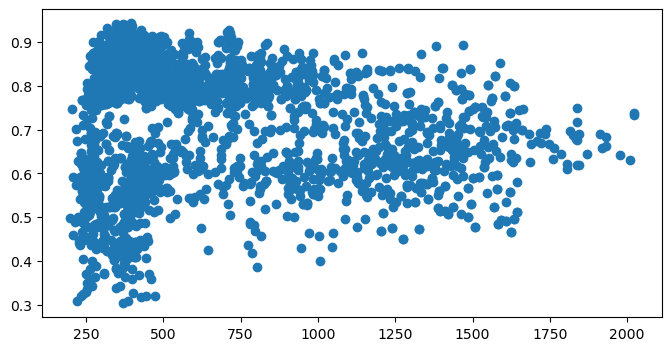

In [60]:
# 导入我们所需的库 as：即给库取别名，方便书写
import matplotlib.pyplot as plt
import numpy as np

# 定义数据


# 绘图
# 1. 确定画布
plt.figure(figsize=(8, 4))  # figsize:确定画布大小 

# 2. 绘图
plt.scatter(y,  # 横坐标
            z,  # 纵坐标
              # 点的颜色
            )  # 标签 即为点代表的意思
# 3.展示图形
  # 显示图例

plt.show()  # 显示所绘图形


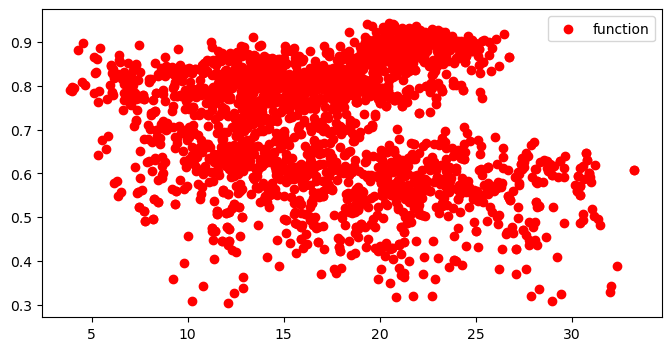

In [58]:
# 导入我们所需的库 as：即给库取别名，方便书写
import matplotlib.pyplot as plt
import numpy as np

# 定义数据


# 绘图
# 1. 确定画布
plt.figure(figsize=(8, 4))  # figsize:确定画布大小 

# 2. 绘图
plt.scatter(x,  # 横坐标
            z,  # 纵坐标
            c='red',  # 点的颜色
            label='function')  # 标签 即为点代表的意思
# 3.展示图形
plt.legend()  # 显示图例

plt.show()  # 显示所绘图形


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


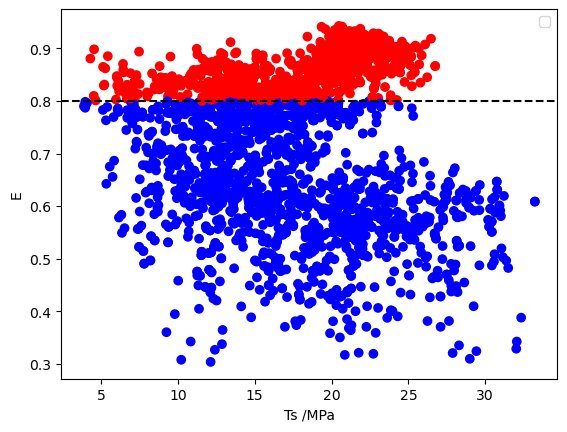

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据


# 创建散点图
plt.scatter(x, z, c=np.where(z > 0.8, 'r', 'b'))

# 标记大于0.9和小于等于0.9的点
plt.plot([], c='r')
plt.plot([], c='b' )
plt.axhline(y= 0.8, color='black', linestyle='--')
# 添加图例
plt.legend()

# 设置标题和坐标轴标签
#plt.title('Scatter Plot')
plt.xlabel('Ts /MPa')
plt.ylabel('E')

# 显示图形
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


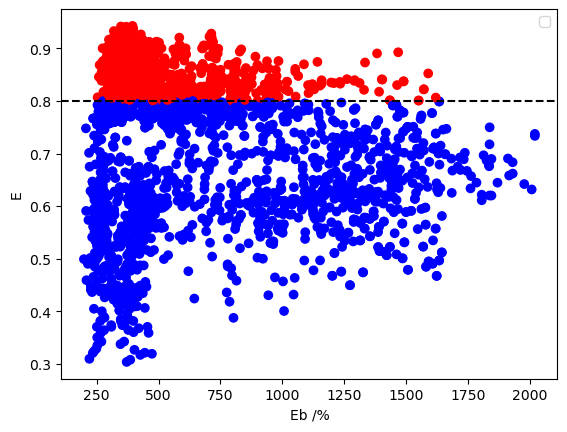

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据


# 创建散点图
plt.scatter(y, z, c=np.where(z > 0.8, 'r', 'b'))

# 标记大于0.9和小于等于0.9的点
plt.plot([], c='r')
plt.plot([], c='b')

plt.axhline(y= 0.8, color='black', linestyle='--')
# 添加图例
plt.legend()

# 设置标题和坐标轴标签
#plt.title('')
plt.xlabel('Eb /%')
plt.ylabel('E')

# 显示图形
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


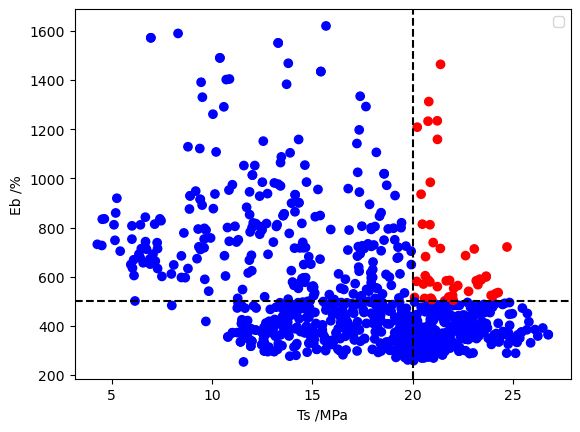

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据


# 创建散点图
plt.scatter(x, y, c=np.where((y > 500) & (x > 20), 'r', 'b'))

# 标记大于0.9和小于等于0.9的点
plt.plot([], c='r')
plt.plot([], c='b')
plt.axhline(y= 500, color='black', linestyle='--')
plt.axvline(x= 20, color='black', linestyle='--')
# 添加图例
plt.legend()

# 设置标题和坐标轴标签
#plt.title('Scatter Plot with Color Based on Y Value')
plt.xlabel('Ts /MPa')
plt.ylabel('Eb /%')

# 显示图形
plt.show()